# Periodic boundary and convex sets

In [1]:

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
sys.path.append('../../..')
from proximal.dynamicUOT import computeGeodesic
from proximal.grids import speed_and_growth
import ipywidgets as widgets
from ipywidgets import interact

## 1D Gaussian bump with periodic boundary (unconstrained)

# Set up

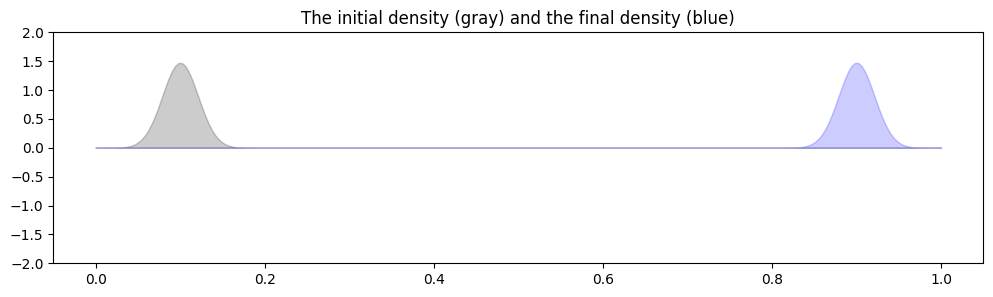

In [2]:
# Plotting initial and the final density
sigma = 0.03
K = 256
X = np.linspace(0, 1, K)  # Discretization of the time-space domain

def gauss(x, x_0, sigma, mass):
    # Gaussian bump
    normalized_factor = np.exp(-((x - x_0) ** 2) / sigma ** 2)
    return mass * (normalized_factor * K / np.sum(normalized_factor))

rho_0 = gauss(X, 0.1, sigma, 1)  # Initial density
rho_1 = gauss(X, 0.9, sigma, 1)  # Final density

# Normalizing densities
rho_0 /= np.sum(rho_0) / 20
rho_1 /= np.sum(rho_1) / 20

# Plotting
plt.figure(figsize=(12, 3))
plt.ylim(-2, 2)
plt.title("The initial density (gray) and the final density (blue)")
plt.fill_between(X, rho_0, color="k", alpha=0.2)  # Use fill_between for similar effect to fill in Julia
plt.fill_between(X, rho_1, color="b", alpha=0.2)
plt.show()

In [3]:
T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=0.5/np.pi, niter=3000, periodic = True)

In [4]:
def plot_1D(t, x, v, g, X, rho_0, rho_1, ylim=[-2, 2], title=""):
    plt.figure(figsize=[16, 4])

    # Fill plots
    if rho_0 is not None:
        plt.fill_between(X, rho_0, color="k", alpha=0.2, label=r'$\rho_0$')
    if rho_1 is not None:
        plt.fill_between(X, rho_1, color="b", alpha=0.2, label=r'$\rho_1$')
    plt.fill_between(X, x.V.D[0][t, :], color="r", alpha=0.7, label=r'$\rho_{t}$')

    # Line plots
    plt.plot(X, v[0][t, :], "k", label=r'$v_t$')
    plt.plot(X, g[t, :], "g", label=r'$g_t$')
    plt.title(title)
    plt.axis([0, 1, ylim[0], ylim[1]])
    plt.show()

v,g = speed_and_growth(x.V)
plot_elements1 = [x.copy(), v.copy(), g.copy(), X.copy(), rho_0.copy(), rho_1.copy(), [-2,2], r"(grey) $\rho_0$, (blue) $\rho_1$ (red) $\rho_t$ (green) $g_t$ (dark) $v_t$"]
interact(lambda t: plot_1D(t, *plot_elements1), t=widgets.IntSlider(min=0, max=T-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.<lambda>(t)>

periodic vs nonperiodic

## 1D Gaussian bump with periodic boundary (Total mass constraint)

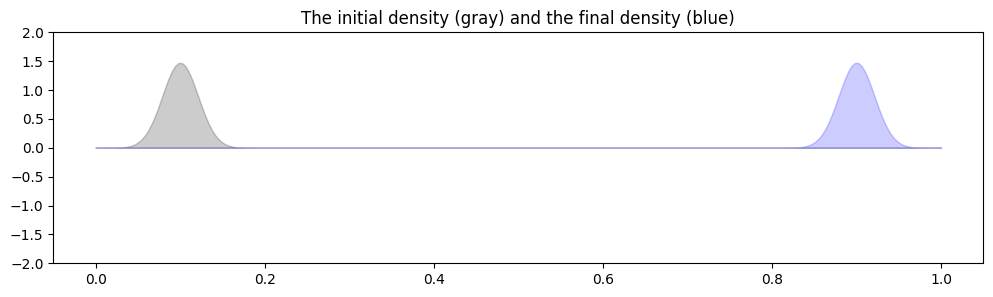

In [5]:
# Plotting initial and the final density
sigma = 0.03
T = 15
K = 256
X = np.linspace(0, 1, K)  # Discretization of the time-space domain

def gauss(x, x_0, sigma, mass):
    # Gaussian bump
    normalized_factor = np.exp(-((x - x_0) ** 2) / sigma ** 2)
    return mass * (normalized_factor * K / np.sum(normalized_factor))

rho_0 = gauss(X, 0.1, sigma, 1)  # Initial density
rho_1 = gauss(X, 0.9, sigma, 1)  # Final density

# Normalizing densities
rho_0 /= np.sum(rho_0) / 20
rho_1 /= np.sum(rho_1) / 20

# Plotting
plt.figure(figsize=(12, 3))
plt.ylim(-2, 2)
plt.title("The initial density (gray) and the final density (blue)")
plt.fill_between(X, rho_0, color="k", alpha=0.2)  # Use fill_between for similar effect to fill in Julia
plt.fill_between(X, rho_1, color="b", alpha=0.2)
plt.show()

H = np.ones((T, K))  # Initialize the H function
t = np.linspace(0, 1, T)  # Time discretization
F = 20 * 4 * ((t - 0.5) ** 2) /256  # Example function for F

In [6]:
T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=0.5/np.pi, H=H, F=F, niter=3000, periodic=True)

In [7]:
T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=0.5/np.pi, H=H, F=F, niter=3000, periodic=True, big_matrix=True)

c:\Users\mao17\Workspace\pdot\venv\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve


In [21]:
def plot_1D(t, x, v, g, X, rho_0, rho_1, ylim=[-2, 2], title=""):
    plt.figure(figsize=[16, 4])

    # Fill plots
    if rho_0 is not None:
        plt.fill_between(X, rho_0, color="k", alpha=0.2, label=r'$\rho_0$')
    if rho_1 is not None:
        plt.fill_between(X, rho_1, color="b", alpha=0.2, label=r'$\rho_1$')
    plt.fill_between(X, x.V.D[0][t, :], color="r", alpha=0.7, label=r'$\rho_{t}$')

    # Line plots
    plt.plot(X, v[0][t, :], "k", label=r'$v_t$')
    plt.plot(X, g[t, :], "g", label=r'$g_t$')
    plt.title(title)
    plt.axis([0, 1, ylim[0], ylim[1]])
    plt.show()

v,g = speed_and_growth(x.V)
plot_elements2 = [x.copy(), v.copy(), g.copy(), X.copy(), rho_0.copy(), rho_1.copy(), [-2,2], r"(grey) $\rho_0$, (blue) $\rho_1$ (red) $\rho_t$ (green) $g_t$ (dark) $v_t$"]
interact(lambda t: plot_1D(t, *plot_elements2), t=widgets.IntSlider(min=0, max=T-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.<lambda>(t)>

periodic sum = consider last point

In [9]:
(H * x.V.D[0]).sum(axis = 1) * (1/256)  # Check the H function applied to the initial density

array([0.07257805, 0.05745351, 0.03993498, 0.02556675, 0.01417789,
       0.00619765, 0.00217219, 0.00116541, 0.00217219, 0.00619765,
       0.01417789, 0.02556675, 0.03993498, 0.05745351, 0.07257805])

# Convex set

In [10]:
def wrap(x):                        # map any real angle to (–π,π]
    return (x + np.pi) % (2*np.pi) - np.pi

def gaussian_on_circle(t, mu, sigma):
    return np.exp(-0.5 * wrap(t-mu)**2 / sigma**2)

def rho_two_bumps(theta, mu=0.0, sigma=0.25):
    g1  = gaussian_on_circle(theta,        mu, sigma)
    g2  = gaussian_on_circle(theta, mu+np.pi, sigma)    # shifted by π
    rho = g1 + g2                                      # ρ ≥ 0
    return rho / rho.sum()                             # (optional) normalise

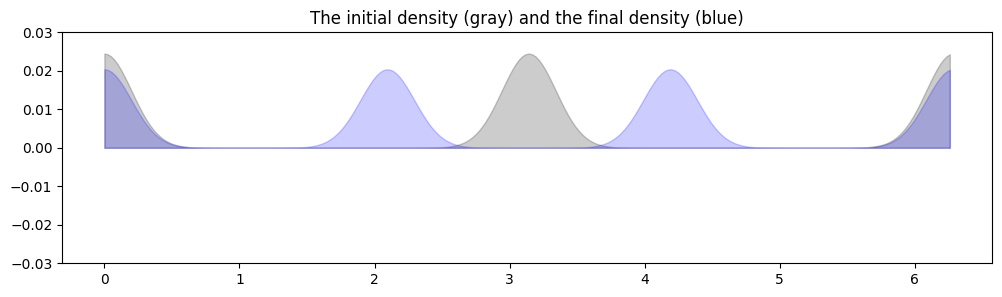

In [11]:
# Plotting initial and the final density
sigma = 0.2
T = 15
K = 256
X = np.linspace(0, 2 * np.pi, K, False)  # Discretization of the time-space domain
rho_0 = rho_two_bumps(X, mu=0, sigma=sigma)  # Initial density
rho_1 = gaussian_on_circle(X, mu=0, sigma = sigma) + gaussian_on_circle(X, mu=2 * np.pi / 3, sigma = sigma) + gaussian_on_circle(X, mu=4 * np.pi / 3, sigma = sigma)  # Final density
rho_1 = rho_1 / (0.8 * rho_1.sum())

# Plotting
plt.figure(figsize=(12, 3))
plt.ylim(-0.03, 0.03)
plt.title("The initial density (gray) and the final density (blue)")
plt.fill_between(X, rho_0, color="k", alpha=0.2)  # Use fill_between for similar effect to fill in Julia
plt.fill_between(X, rho_1, color="b", alpha=0.2)
plt.show()

theta = np.linspace(0, 2 * np.pi, K, endpoint = False)  # Discretization of the time-space domain
H = [np.vstack([np.cos(theta)] * T), np.vstack([np.sin(theta)] * T)]  # Initialize the H function
F = [np.zeros(T), np.zeros(T)]  # Initialize the F function

In [40]:
T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=0.01, H=H, F=F, niter=3000, periodic = True, big_matrix=True)

c:\Users\mao17\Workspace\pdot\venv\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve


In [36]:
def plot_1D(t, x, v, g, X, rho_0, rho_1, ylim=[-2, 2], title=""):
    plt.figure(figsize=[16, 4])

    # Fill plots
    if rho_0 is not None:
        plt.fill_between(X, rho_0, color="k", alpha=0.2, label=r'$\rho_0$')
    if rho_1 is not None:
        plt.fill_between(X, rho_1, color="b", alpha=0.2, label=r'$\rho_1$')
    plt.fill_between(X, x.V.D[0][t, :], color="r", alpha=0.7, label=r'$\rho_{t}$')

    # Line plots
    plt.plot(X, v[0][t, :]/100, "k", label=r'$v_t$')
    plt.plot(X, g[t, :]/100, "g", label=r'$g_t$')
    plt.title(title)
    plt.axis([0, 2 * np.pi, ylim[0], ylim[1]])
    plt.show()

v,g = speed_and_growth(x.V)
plot_elements3 = [x.copy(), v.copy(), g.copy(), X.copy(), rho_0.copy(), rho_1.copy(), [-0.03, 0.03], r"(grey) $\rho_0$, (blue) $\rho_1$ (red) $\rho_t$ (green) $g_t$ (dark) $v_t$"]
interact(lambda t: plot_1D(t, *plot_elements3), t=widgets.IntSlider(min=0, max=T-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.<lambda>(t)>

In [32]:
np.sum(H[0] * x.V.D[0], axis=1)  # Check the first component of H against the geodesic

array([-7.30828490e-09, -3.02138965e-09,  2.07973713e-09,  2.85423792e-10,
       -3.69832467e-10,  2.24694360e-11,  3.61700531e-11, -7.74976194e-11,
       -3.48953609e-11,  1.49961293e-11,  1.08153903e-10, -2.04420690e-04,
       -2.04420736e-04, -5.65394583e-04, -5.65391824e-04])

In [33]:
np.sum(H[1] * x.V.D[0], axis=1)  # Check the second component of H against the geodesic

array([-1.66533454e-16, -5.55111512e-17,  0.00000000e+00,  2.77555756e-17,
        0.00000000e+00,  5.55111512e-17,  0.00000000e+00, -5.55111512e-17,
        5.55111512e-17,  1.11022302e-16,  0.00000000e+00,  4.99600361e-15,
        5.16253706e-15,  3.21964677e-15,  3.10862447e-15])

In [16]:
np.sum(H[0][0] * rho_0)  # Check the first component of H against the geodesic

np.float64(-4.163336342344337e-17)

In [17]:
np.sum(H[1][0] * rho_0)  # Check the first component of H against the geodesic

np.float64(4.163336342344337e-17)

In [18]:
np.sum(H[0][0] * rho_1)  # Check the first component of H against the geodesic

np.float64(-9.020562075079397e-17)

In [19]:
np.sum(H[1][0] * rho_1)  # Check the first component of H against the geodesic

np.float64(1.6653345369377348e-16)

In [38]:
from proximal.grids import CSvar 
x = CSvar(rho_0, rho_1, T, ll)

In [41]:
rho_series = x.V.D[0]  # Extract the density series from the geodesic
# ⬇️ Put this in a Jupyter notebook AFTER you have defined `rho_series`
#     ---------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# ---------- helper to build one curve from a direction-measure ----
def reconstruct_curve(rho, theta):
    dtheta = theta[1] - theta[0]           # 2π/K
    seglen = rho * dtheta                  # physical edge lengths
    step   = np.column_stack((seglen*np.cos(theta),
                              seglen*np.sin(theta)))

    V = np.concatenate([[(0.0, 0.0)],
                        np.cumsum(step, axis=0)])   # closed walk
    V[-1] = V[0]                                    # enforce closure
    V -= V.mean(axis=0)                             # centre at origin
    return V                                        # (K+1, 2)

# ---------- pre-compute curves and global plot window -------------
K  = rho_series.shape[1]
T  = rho_series.shape[0]
theta  = np.linspace(0.0, 2*np.pi, K, endpoint=False)

curves = [reconstruct_curve(rho_series[t], theta) for t in range(T)]

# largest distance any vertex gets from the origin …
r_max = max(np.linalg.norm(V, axis=1).max() for V in curves)
margin = 0.05 * r_max                                # small padding
xlim = (-r_max - margin, r_max + margin)
ylim = (-r_max - margin, r_max + margin)

# ---------- interactive viewer ------------------------------------
def show(t=0):
    V = curves[t]
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot(V[:, 0], V[:, 1], lw=2, ms=4)
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel("x"); ax.set_ylabel("y")
    ax.set_title(f"t = {(t+0.5)/T:.2f}")
    ax.grid(True)
    plt.show()

interact(show,
         t=IntSlider(min=0, max=T-1, step=1,
                     value=0))    

interactive(children=(IntSlider(value=0, description='t', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.show(t=0)>